In [1]:
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
import pandas as pd
import mglearn as mg
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target==9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [3]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)

print(np.unique(pred_most_frequent))
print(dummy_majority.score(X_test, y_test))

[False]
0.8955555555555555


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(tree.score(X_test, y_test))
print(np.unique(pred_tree))

0.9177777777777778
[False  True]


In [6]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)
print(dummy.score(X_test, y_test))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(logreg.score(X_test, y_test))

0.8955555555555555
0.9844444444444445


/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(confusion)

[[402   1]
 [  6  41]]


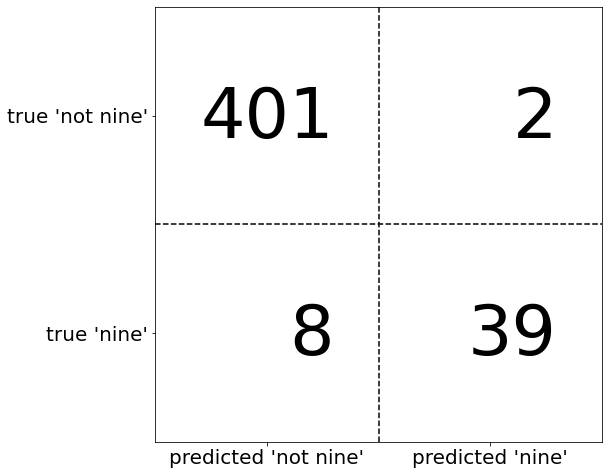

In [8]:
mg.plots.plot_confusion_matrix_illustration()

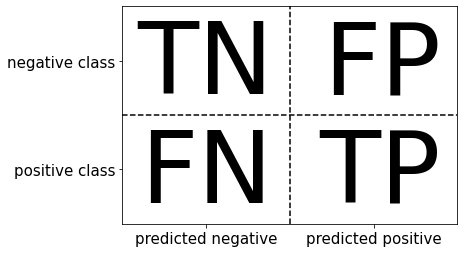

In [9]:
mg.plots.plot_binary_confusion_matrix()

In [10]:
print(confusion_matrix(y_test, pred_most_frequent))
print(confusion_matrix(y_test, pred_dummy))
print(confusion_matrix(y_test, pred_tree))
print(confusion_matrix(y_test, pred_logreg))

[[403   0]
 [ 47   0]]
[[403   0]
 [ 47   0]]
[[390  13]
 [ 24  23]]
[[402   1]
 [  6  41]]


In [11]:
from sklearn.metrics import f1_score

print(f1_score(y_test, pred_most_frequent))
print(f1_score(y_test, pred_dummy))
print(f1_score(y_test, pred_tree))
print(f1_score(y_test, pred_logreg))

0.0
0.0
0.5542168674698795
0.9213483146067415


In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent,
                           target_names = ["Not Nine", "Nine"]))

              precision    recall  f1-score   support

    Not Nine       0.90      1.00      0.94       403
        Nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(classification_report(y_test, pred_dummy,
                           target_names = ["Not Nine", "Nine"]))

              precision    recall  f1-score   support

    Not Nine       0.90      1.00      0.94       403
        Nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
print(classification_report(y_test, pred_logreg,
                           target_names = ["Not Nine", "Nine"]))

              precision    recall  f1-score   support

    Not Nine       0.99      1.00      0.99       403
        Nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [17]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

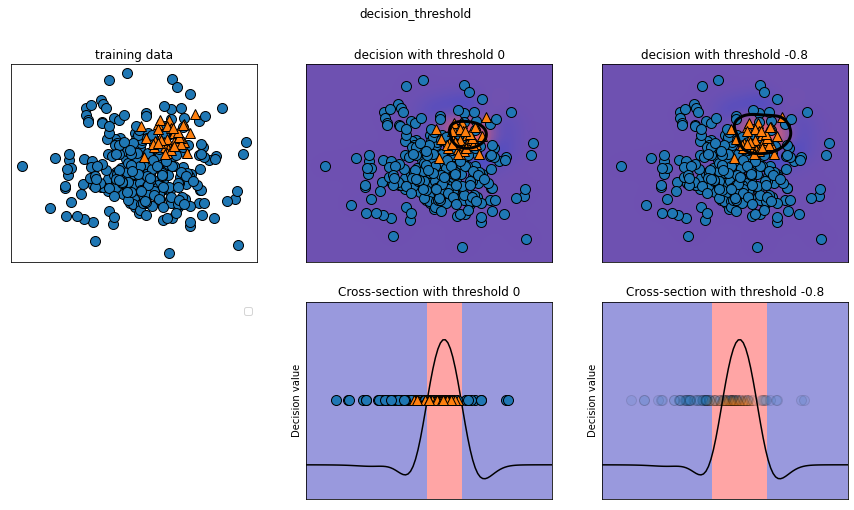

In [18]:
mg.plots.plot_decision_threshold()

In [19]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [20]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [21]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



In [22]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,
                                                       svc.decision_function(X_test))

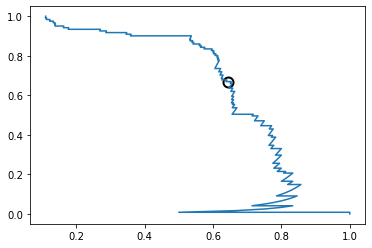

In [24]:
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=0.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test,
                                                       svc.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label = '0', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='curve')

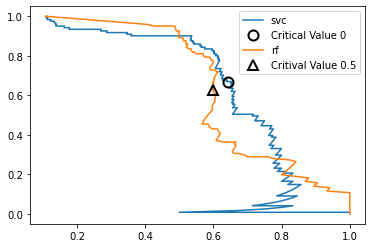

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
        label='Critical Value 0', fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
        markersize=10, label='Critival Value 0.5', fillstyle='none', mew=2)
plt.legend(loc='best')

In [26]:
print(f1_score(y_test, rf.predict(X_test)))
print(f1_score(y_test, svc.predict(X_test)))

0.6097560975609757
0.6558704453441295


In [27]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))

print(ap_rf)
print(ap_svc)

0.659559370099291
0.6663140319391998


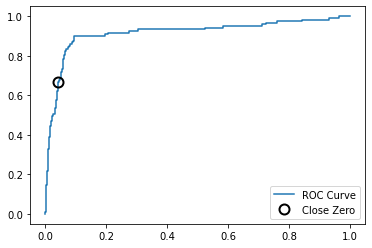

In [28]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC Curve')
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='Close Zero', fillstyle='none', c='k', mew=2)
plt.legend(loc='best')

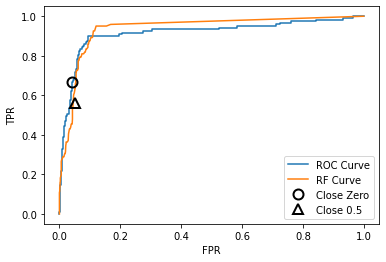

In [30]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='ROC Curve')
plt.plot(fpr_rf, tpr_rf, label='RF Curve')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
        label='Close Zero', fillstyle='none', c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
        label='Close 0.5', fillstyle='none', c='k', mew=2)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')

In [31]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))

print(rf_auc)
print(svc_auc)

0.9366953672911659
0.9162935036712654


In [32]:
y = digits.target ==9

gamma=1.00 Accuracy=0.90 AUC=0.50
gamma=0.10 Accuracy=0.90 AUC=0.96
gamma=0.01 Accuracy=0.90 AUC=1.00


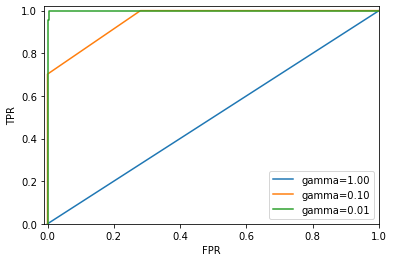

In [33]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    acc = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma={:.2f} Accuracy={:.2f} AUC={:.2f}".format(gamma, acc, auc))
    plt.plot(fpr, tpr, label='gamma={:.2f}'.format(gamma))
    
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')

In [34]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion Metrics: \n", confusion_matrix(y_test, pred))

Accuracy: 0.953
Confusion Metrics: 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


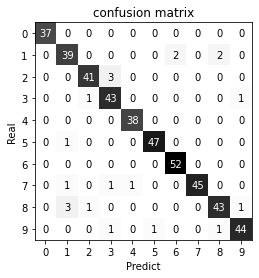

In [35]:
scores_image = mg.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predict',
    ylabel='Real', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')
plt.title('confusion matrix')
plt.gca().invert_yaxis()

In [36]:
print(classification_report(y_test, pred
                           ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [37]:
print(f1_score(y_test, pred, average='micro'))
print(f1_score(y_test, pred, average='macro'))
print(f1_score(y_test, pred, average='weighted'))

0.9533333333333334
0.9539995483362096
0.9533352843608719


In [40]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(SVC(), digits.data, digits.target ==9, cv=5))

explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target ==9, scoring='accuracy', cv=5)
print(explicit_accuracy)

roc_auc = cross_val_score(SVC(), digits.data, digits.target==9, scoring='roc_auc', cv=5)
print(roc_auc)

[0.975      0.99166667 1.         0.99442897 0.98050139]
[0.975      0.99166667 1.         0.99442897 0.98050139]
[0.99717078 0.99854252 1.         0.999828   0.98400413]


In [42]:
from sklearn.model_selection import cross_validate

res = cross_validate(SVC(), digits.data, digits.target==9, scoring=['accuracy', 'roc_auc', 'recall_macro'],
                    return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.019706,0.013115,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.014251,0.009374,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.012989,0.009263,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.012300,0.009321,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.012084,0.008900,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target==9, random_state=0)

param_grid = {'gamma': [.0001, .01, .1, 1, 10]}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

print(average_precision_score(y_test, grid.decision_function(X_test)))
print(grid.score(X_test, y_test))

{'gamma': 0.0001}
0.971789161098738
0.9656749529729884
0.9733333333333334


In [44]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring='average_precision', cv=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_score_)

print(average_precision_score(y_test, grid.decision_function(X_test)))
print(grid.score(X_test, y_test))

{'gamma': 0.01}
0.9848054272142445
0.9958247456096899
0.9958247456096899


In [45]:
from sklearn.metrics import SCORERS
print(sorted(SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']
